<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 인공 신경망을 구성하는 절차
# 1. 더미데이터 준비
# 2. 훈련, 검증, 테스트용으로 나눔
# 3. 심층(dense)을 만듦
# 4. model에 적용
# 5. 컴파일 진행 (최적화 기법을 적용 : adam)
# 6. fit(훈련)
# 7. evaluate(검증)

In [ ]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안
#           훈련 과정이 산세하게 출력되어 확인할 수 있다.(에포크 횟수, 손실, 정확도)
# 아래쪽에 이 출력 메세지가 나옴
# 코랩 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력

# 다시말해 fit()메서드는 History라는 클래스 객체를 반환함 (훈련과정의 지표, 손실, 정확도 등 내장)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다.

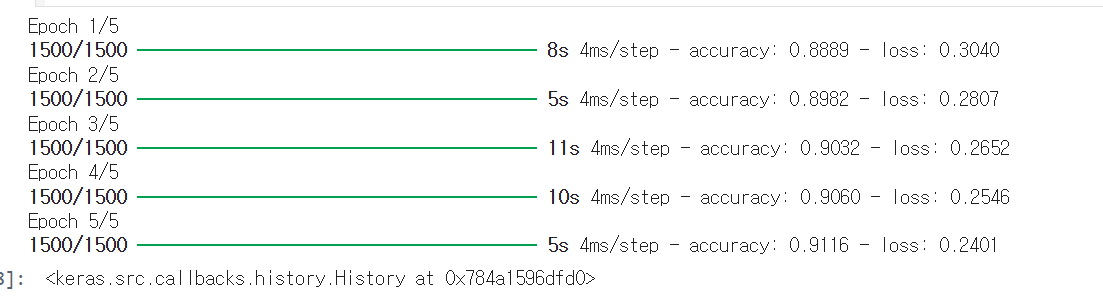

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) =\
    keras.datasets.fashion_mnist.load_data()
# 엔터 무시용 \

train_scaled = train_input/255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target, test_size=0.2,random_state=42
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print("훈련 데이터 :")
print(train_scaled.shape,train_target.shape)
print("테스트 데이터 :")
print(test_input.shape,test_target.shape)
print("검증 데이터 :")
print(val_scaled.shape,val_target.shape)

훈련 데이터 :
(48000, 28, 28) (48000,)
테스트 데이터 :
(10000, 28, 28) (10000,)
검증 데이터 :
(12000, 28, 28) (12000,)


In [5]:
# 모델을 만드는 함수를 정의함 (하나의 매개변수를 받아 리턴) .model_fn(dense 추가하면 생성)
def model_fn(a_layer=None): # 파라미터 기본값 : None
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 반복적으로 사용되는 입력층
    model.add(keras.layers.Dense(100, activation='relu')) # 반복적으로 사용되는 이진분류층 활성화 함수 : 렐루

    # model_fn() 함수에 (a_layer 매개변수) 케라스층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax')) # 반복적으로 사용되는 다중분류층

    return model

In [6]:
model = model_fn() # 위에서 만든 메서드를 호출하여 모델에 담음
#       매개 값이 없으면 그냥 생성, 있으면 모델 추가용 (기본값 : None)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#                              다중분류              accuracy 정확도

In [23]:
# fit() 메서드 결과를 history 변수에 담아 봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=2) # 23초 걸림
#                                                         훈련과정 출력을 조절 함
#                           verbose=0 훈련과정을 나타내지 않음
#                           verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
#                           verbose=2 진행막대 빼고 출력

Epoch 1/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8936 - loss: 0.3014
Epoch 2/5
1500/1500 - 5s - 4ms/step - accuracy: 0.8986 - loss: 0.2892
Epoch 3/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9013 - loss: 0.2814
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.9045 - loss: 0.2732
Epoch 5/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9076 - loss: 0.2652


In [24]:
print(history) # 훈련한 결과가 History 객체에 있는데 이것을 history 변수에 담음

In [25]:
print(history.history.keys())
# 훈련 측정 값이 담겨있는 history 딕셔너리가 존재함
# 정확도(accuracy),손실(loss)값이 담겨있다.

# 정확도는 compile()메서드의 metrics 매개변수에 accuracy를 추가했기 때문에
# history 속성에 포함되었음

dict_keys(['accuracy', 'loss'])


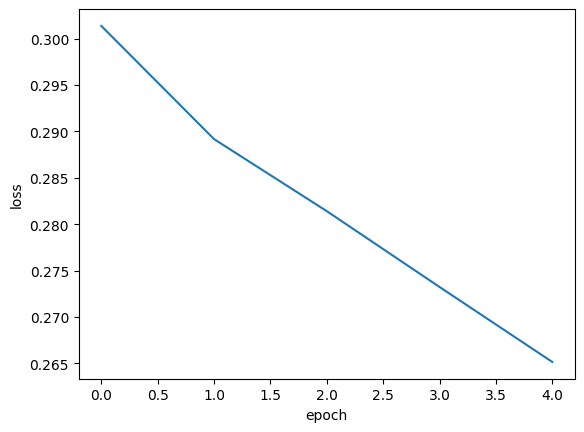

In [26]:
import matplotlib.pyplot as plt
# history 속성에 포함된 솔실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트, 때문에 쉽게 그래프 처리가 가능
plt.plot(history.history['loss']) #손실율
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작, 5개의 에포크가 0~4까지 x축에 표현
plt.ylabel('loss')
plt.show()

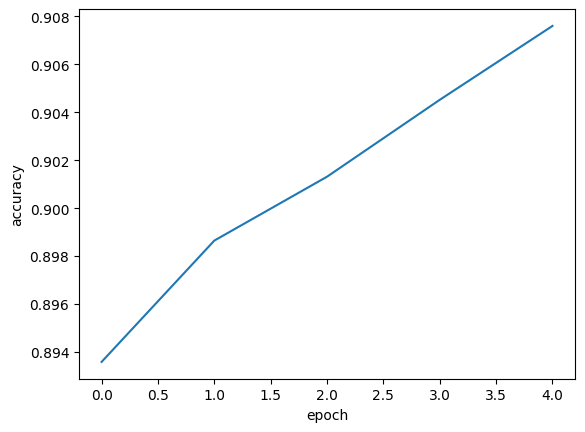

In [27]:
# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 결과 분석 : 에포크마다 손실이 감소하고 정확도가 향상함

In [29]:
# 이번에는 에포크 횟수를 20번으로 늘려서 보자!
model = model_fn() # 메서드로 모델 생성(입력층,은닉층,출력층 3개층)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled,train_target,epochs=20,verbose=0) # 93초 소요

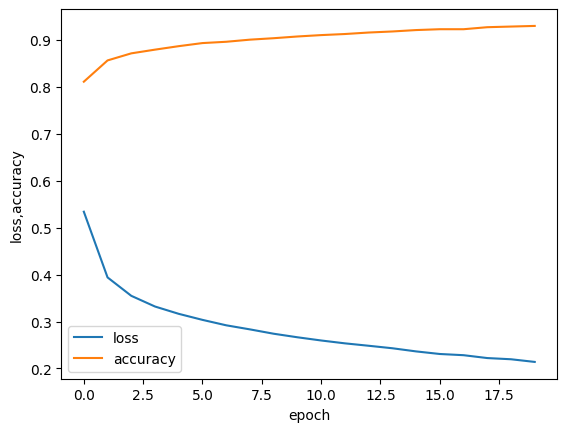

In [30]:
# 손실율, 정확도 차트화
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.xlabel('epoch')
plt.ylabel('loss,accuracy')
plt.legend(['loss','accuracy'])
plt.show()
#

In [ ]:
# 검증 손실 validation_data = (val_scaled,val_target)
# 예전에 확률적 경사 하강법을 사용했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다.
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증 세트에 대한 점수도 필요함
# 그래서 위에처럼 손실과 정확도만 그리면 파악이 어렵다.
# 검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

# keypoint https://wikidocs.net/236194
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이
# 인공신경망 모델이 최적화하는 대상은 정화곧가 아니라 손실 함수임
# 손실 감소에 비레하여 정확도가 높아지지 않는 경우가 있는데
# 모델이 잘 훈련되었는지 판단하려면 정확도보다 손실함수의 값을 확인하는 것이 더 좋은 방법임

In [32]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled,train_target,epochs=20,verbose=1,
                    validation_data=(val_scaled,val_target))
# 검증 손실을 구하기 위핸 매개값 추가 (validation_data) 147초 소요

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7637 - loss: 0.6723 - val_accuracy: 0.8473 - val_loss: 0.4305
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8518 - loss: 0.4061 - val_accuracy: 0.8569 - val_loss: 0.3989
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8691 - loss: 0.3596 - val_accuracy: 0.8613 - val_loss: 0.3856
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8801 - loss: 0.3348 - val_accuracy: 0.8627 - val_loss: 0.3884
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8861 - loss: 0.3174 - val_accuracy: 0.8674 - val_loss: 0.3788
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8916 - loss: 0.3045 - val_accuracy: 0.8651 - val_loss: 0.3914
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8985 - loss: 0.2929 - val_accuracy: 0.8648 - val_loss: 0.4089
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9017 - loss: 0.2839 -

In [33]:
print(history.history.keys())
# ['accuracy', 'loss', 'val_accuracy', 'val_loss'
# 추가로 검증세트 정확도, 검증세트 손실이 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


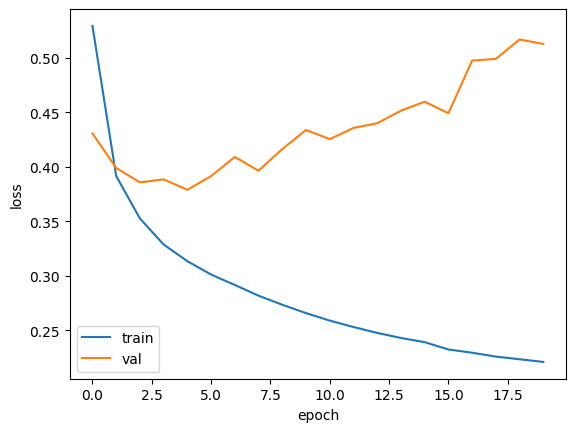

In [34]:
# 과대/과소 적합 문제를 조사하기 위해 훈련손실, 검증손실을 차트화해서 비교해보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 결과 분석
# 초기에 검증 손실이 감소하다가 다섯번째 에포크만에 다시 상승함
# 훈련손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어짐
# 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고
# 검증세트에 대한 정확도가 증가할 것 같다

# 과대적합을 막기 위해 예전에 사용했던 규제방식 대신에
# 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자.

In [36]:
# 지금은 옵티마이저(최적화) 하이퍼 파라미터를 자동 조절하여 과대 적합을 완화시켜보자
# RMSprop 옵티마이저는 많은 문제에서 잘~ 동작한다. (Adagrad,Adam 등도 있다)
model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 139초 소요
#                           verbose=0 훈련과정을 나타내지 않음
#                           verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
#                           verbose=2 진행막대 빼고 출력

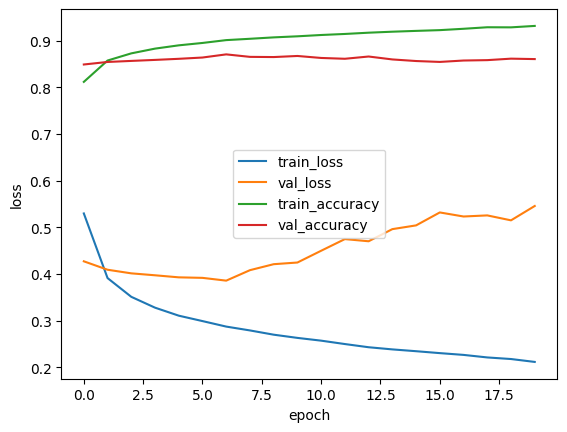

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


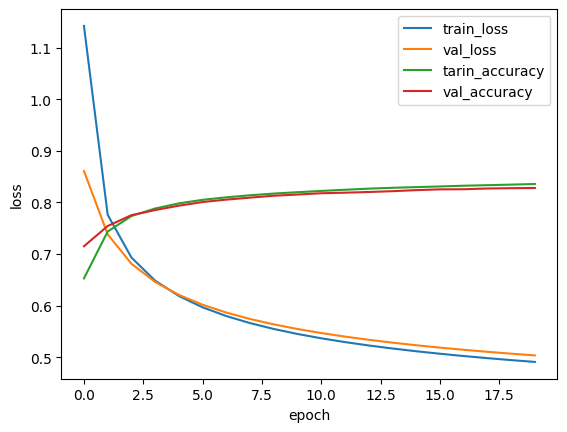

In [39]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()    # Adagrad 기법으로 최적화 후 차트로 보자
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 128초 소요

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()

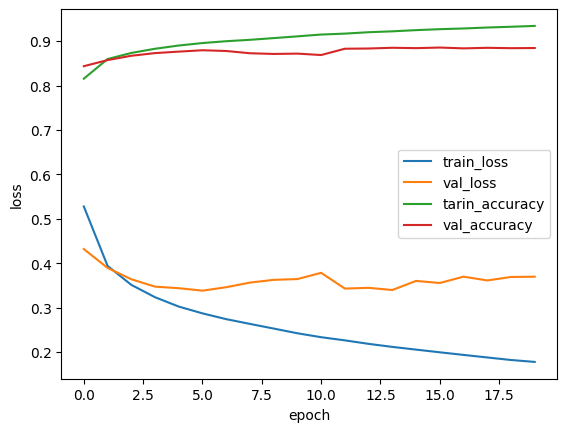

In [40]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))   #

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()
# 3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보인다.
# 대신 과대적합을 막기위한 기법이 필요해 보인다. (90% 이상의 정확도)

In [ ]:
# 드롭아웃(Drop out)은 제프리 힌턴이 소개한 딥러닝의 기초다..
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 껴서 과대 적합을 막음
# -> 뉴런 출력을 0으로 만듦

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다름 샘플을 처리할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임

# 드롭 아웃이 왜 과대적합을 막을 수 있을지 생각을 해보자
# 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고
# 모든 입력에 대해 주의를 기울여야함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

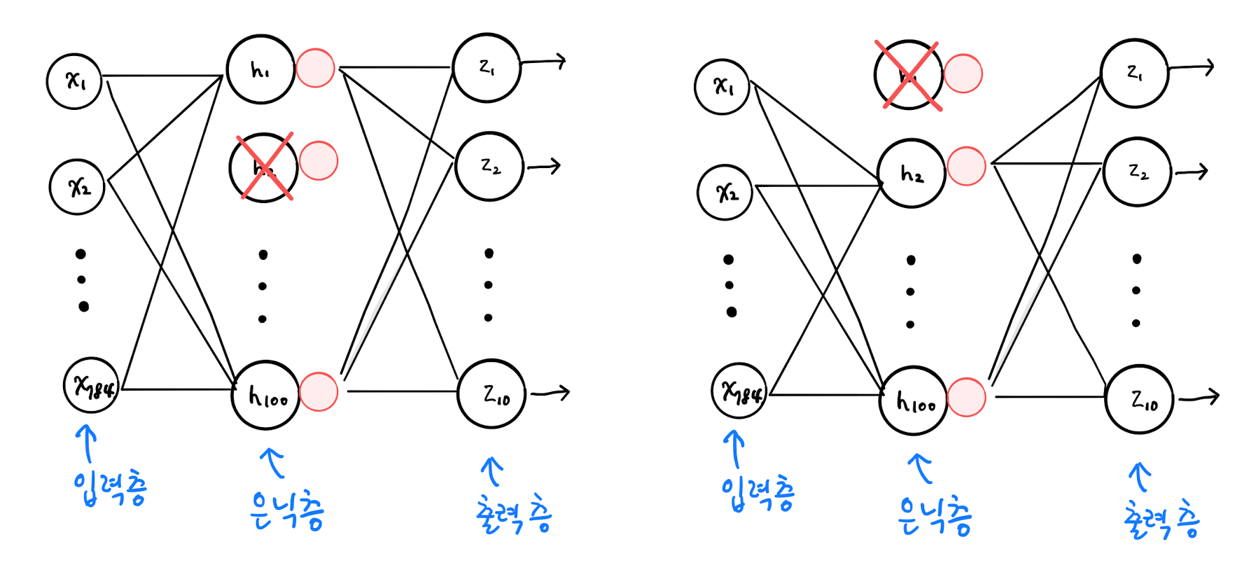

In [41]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것 처럼 상상하게 됨
# 앙상블 : 더 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘
#         과대적합을 막아주는 좋은 기법

# 캐라스에서는 드롭아웃을 keras.layers.Dropout 으로 제공함
# 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# 매개값(드롭아웃객체)를 전달하여 모델에 층을 추가
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 드롭아웃
model.summary()
# 은닉층 뒤에 추가된 드롭아웃층(3번째 값) 은 훈련되는 모델 파라미터가 없음
# 입출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7342 - loss: 0.7622 - val_accuracy: 0.8456 - val_loss: 0.4248
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8362 - loss: 0.4556 - val_accuracy: 0.8538 - val_loss: 0.3979
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8478 - loss: 0.4155 - val_accuracy: 0.8623 - val_loss: 0.3719
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8586 - loss: 0.3937 - val_accuracy: 0.8644 - val_loss: 0.3691
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8644 - loss: 0.3719 - val_accuracy: 0.8662 - val_loss: 0.3578
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8664 - loss: 0.3594 - val_accuracy: 0.8773 - val_loss: 0.3391
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8712 - loss: 0.3468 - val_accuracy: 0.8749 - val_loss: 0.3433
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8752 - loss: 0.3371

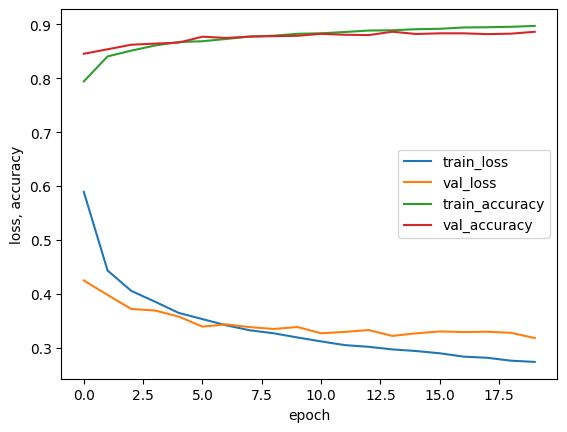

In [44]:
# 주의사항 : 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
# 훈련된 모든 뉴런을 사용해야 올바른 에측이 수행됨
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련 손실과 검증 손실의 그래프를 그려보자!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled,train_target,epochs=20,# verbose=1 ((기본값)
                    validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
# 과대적합이 확실히 줄어듦 10번째 에포크가 검증손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 돌려볼까? (조기종료)

In [48]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model-ep10.weights.h5') # HDF5 형식으로도 저장됨 (폴더에서 확인)

In [49]:
# 저장된 모델을 불러와 테스트를 진행
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 03:49 model-ep10.weights.h5
-rw-r--r-- 1 root root 979412 Nov 13 03:49 model-whole-ep10.keras


In [51]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model-ep10.weight.h5 파일에서
# 훈련된 모델 파라미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model-ep10.weights.h5') # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weights() 메서드임
# 주의사항 : load_weights() 메서드를 사용하려면 save_weight() 메서드로 저장했던 모델과
#정확히 같은 구조를 가져야함

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# 모델의 검증 정확도를 확인해보자.
import numpy as np

# predict() 메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환(다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증세트의 샘플수는 12,000개이기 때문에
# predict() 메서드는 (12000,10) 크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타깃 레이블과 비교하여 정확도를 계산해보자.
val_labels=np.argmax(model.predict(val_scaled),axis=-1)

# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5x3배열에 axis=1로 한값과 axis=0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교하여 같으면 1이되고 다르면 0이됨
# 이를 평균으로 출력해 봄(정확도)
print(np.mean(val_labels == val_target)) # 87.95% 평균

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis=0 이면 행을 따라 각 열의 최대값의 인덱스를 선택함.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교
#   -> 두 배열에서 각 위치의 값이 같으면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8795


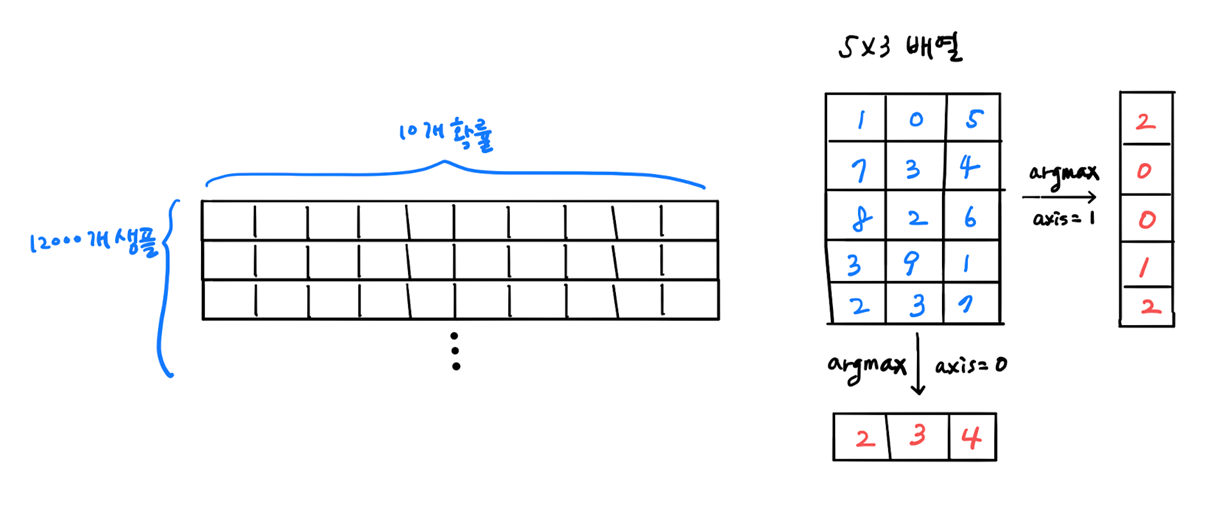

In [53]:
# 모델 전체를 파일에서 읽은 다름 검증세트의 정확도를 출력해봄
model = keras.models.load_model('model-whole-ep10.keras') # load_model() 지정된 캐라스 파일 읽기
model.evaluate(val_scaled,val_target) # 같은 모델을 불러들였기 때문에 위와 정확도가 같음..?
# 로스율 32.88% 정확도 87.94%

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련해서 검증 점수가 상승하는 지점을 확인
# 모델이 과대적합 되지 않는 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구해보자 -> 캐라스 콜백

# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8804 - loss: 0.3268


[0.32884013652801514, 0.8794999718666077]

In [54]:
# 실험 2
# 아예 파일로 새로운 모델을 만들고 바로 사용해보자!
# 추가적으로 콜백을 활용해보자.
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, keras.callbacks 패키지에 있다
# fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용
# 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백, 에포크마다 모델을 저장함
# save_best_only = True 매개변수를 지정하여 가장 낮은 검증 점수의 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)

model.fit(train_scaled,train_target,epochs=20,verbose=1,
          validation_data=(val_scaled,val_target),
          callbacks=[checkpoint_cb]) # 159초 소요
# 모델 훈련 후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7302 - loss: 0.7654 - val_accuracy: 0.8398 - val_loss: 0.4391
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8360 - loss: 0.4574 - val_accuracy: 0.8555 - val_loss: 0.3906
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8499 - loss: 0.4142 - val_accuracy: 0.8656 - val_loss: 0.3659
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8576 - loss: 0.3904 - val_accuracy: 0.8673 - val_loss: 0.3616
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8629 - loss: 0.3690 - val_accuracy: 0.8742 - val_loss: 0.3416
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8682 - loss: 0.3558 - val_accuracy: 0.8703 - val_loss: 0.3429
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8729 - loss: 0.3433 - val_accuracy: 0.8782 - val_loss: 0.3328
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8749 - loss: 0.3386 -

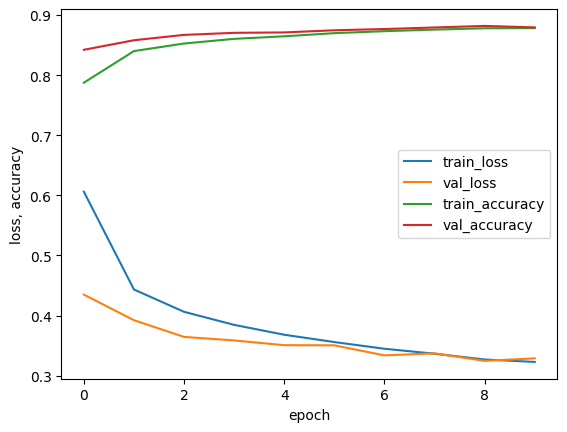

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8844 - loss: 0.3276


[0.32970184087753296, 0.8838333487510681]

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target)
# 검증세트의 성능 확인 (accuracy: 0.8772 - loss: 0.3316) 에포크 9번
# 결론 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크를 저장함.

In [ ]:
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이
# 더 커지기 때문에 훈련을 계속할 필요가 없음.
# 이때 훈련을 종료하면 자원과 시간일 아낄 수 있음 -> 조기종료(early stopping)

# 조기 종료는 딥러닝 분야에 많이 사용하는 기법
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제방법중 하나

In [61]:
# 캐라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 parience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정
# parience = 2 : 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지(parience:인내심)
# restore_best_weights=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled,train_target,epoch=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7258 - loss: 0.7993 - val_accuracy: 0.8407 - val_loss: 0.4286
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8366 - loss: 0.4575 - val_accuracy: 0.8606 - val_loss: 0.3845
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8480 - loss: 0.4153 - val_accuracy: 0.8673 - val_loss: 0.3708
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8607 - loss: 0.3882 - val_accuracy: 0.8730 - val_loss: 0.3505
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8631 - loss: 0.3702 - val_accuracy: 0.8717 - val_loss: 0.3452
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8714 - loss: 0.3562 - val_accuracy: 0.8732 - val_loss: 0.3535
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8694 - loss: 0.3509 - val_accuracy: 0.8733 - val_loss: 0.3500


In [62]:
print(early_stopping_cb.stopped_epoch) # 조기종료 시점 에포크

6


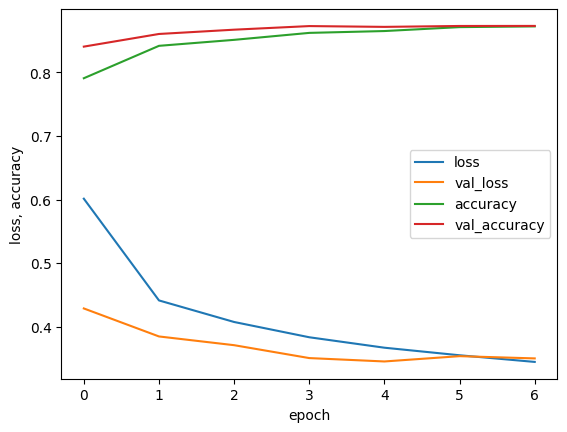

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8741 - loss: 0.3414


[0.3451552391052246, 0.871749997138977]

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 : 0.8741 - loss: 0.3414 에포크 6번
# 드롭아웃은 컴퓨터의 자원을 아끼고, 콜백과 함께 사용하면
# 최상의 모델을 자동으로 저장해 준다는 것을 명심!